## Module 8

### Friend/follower network analysis

In this week's module, we'll perform a network analysis using the friend networks of 15 well known (R-stats) data scientists.

Read-in the data with the script below. You can see the original data collection script (which you don't need to run since the data already exists).

In [19]:
## data script
if (!file.exists("../data/fds-data.rds")) {
    ## load rtweet
    library(rtweet)
    ## get their friends
    fds <- get_friends(ds_screen_names, verbose = FALSE)
    ## get users data
    fds_data <- lookup_users(unique(fds$user_id))
    ## save data
    saveRDS(fds_data, "../data/fds-data.rds")
} else {
    fds_data <- readRDS("../data/fds-data.rds")
}


## b/c i'm seriously the worst, i didn't include all the data
## 15 #rstats data scientists
ds_screen_names <- c("xieyihui", "hadleywickham", "hspter", "rdpeng",
"thomasp85", "eddelbuettel", "jcheng", "silge", "drob", "kwbroman",
"wesmckinn", "romain_francois", "hrbrmstr", "rOpenSci", "albertocairo")

## get their friends
fds <- get_friends(ds_screen_names, verbose = FALSE)

In [20]:
library(tidyverse)

In [21]:
str(fds)

Classes 'tbl_df', 'tbl' and 'data.frame':	10048 obs. of  2 variables:
 $ user   : chr  "xieyihui" "xieyihui" "xieyihui" "xieyihui" ...
 $ user_id: chr  "4831527868" "174467976" "2526390199" "2217099931" ...
 - attr(*, "next_cursor")=List of 15
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL


In [17]:
summary(fds)

     Length Class      Mode
[1,] 0      data.frame list

In [18]:
str(fds_data)

Classes 'tbl_df', 'tbl' and 'data.frame':	7748 obs. of  20 variables:
 $ user_id               : chr  "4831527868" "174467976" "2526390199" "2217099931" ...
 $ name                  : chr  "tomatoiscoding" "Hui Lin" "Alicia Carriquiry" "How Things Work" ...
 $ screen_name           : chr  "BeileiBian" "gossip_rabbit" "ALCarriquiry" "ThingsWork" ...
 $ location              : chr  "Shanghai" "Johnston,Iowa, USA" "Ames, Iowa" "email: how@viralspark.net" ...
 $ description           : chr  "<U+68A6><U+60F3><U+5BB6><U+FF0C><U+5B9E><U+73B0><U+68A6><U+60F3><U+7684><U+4E13><U+5BB6>" "Data Scientist, Bookworm, Cosmopolitan, Blogger of https://t.co/By1qOudAEF, @rstats" "Native of #Uruguay, wife to Wolfgang Kliemann, Distinguished Professor of statistics at Iowa State University." "Satisfy your curiosity with amazing new perspectives on how things work." ...
 $ url                   : chr  "https://t.co/GkJYHqoCyM" "https://t.co/By1qOudAEF" NA NA ...
 $ protected             : logi  FALSE FALSE 

Convert the user_ids in the friends data to screen names by merging the looked up data with the friends data. Relable the columns `from` and `to`.

In [22]:
## merge and use screen names to create edge (from, to) network data 
nd <- fds_data %>%
    select(user_id, screen_name) %>%
    right_join(fds, by = "user_id") %>%
    select(from = user, to = screen_name)

## preview data
head(nd)

from,to
xieyihui,BeileiBian
xieyihui,gossip_rabbit
xieyihui,ALCarriquiry
xieyihui,ThingsWork
xieyihui,sctyner
xieyihui,StatSteph


Let's make the network graph easier to read and only include nodes that appear multiple times.

In [23]:
## filter only ego users and other users appearing at least 7 times
ndpop <- nd %>%
    group_by(to) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n > 6 | to %in% unique(from)) %>%
    select(from, to)

Convert the edge data frame to an igraph object and then calculate the size parameter (number of appearances in friends networks).

In [24]:
## create graph object
g <- igraph::graph_from_edgelist(as.matrix(ndpop))

## get node labels
nlabs <- names(igraph::V(g))

## calculate size attribute (and transform to fit)
matcols <- factor(ndpop$to, levels = nlabs)
size <- table(screen_name = matcols)

## reorder freq table
size <- size[match(names(size), nlabs)]

Let's color the nodes differently, depending on whether they were one of the original users whose network we got using `get_friends()`.

In [25]:
ego <- as.numeric(nlabs %in% ds_screen_names)
cols <- c("#ADFF2F99", "darkcyan")[ego + 1]

Finally, plot the network

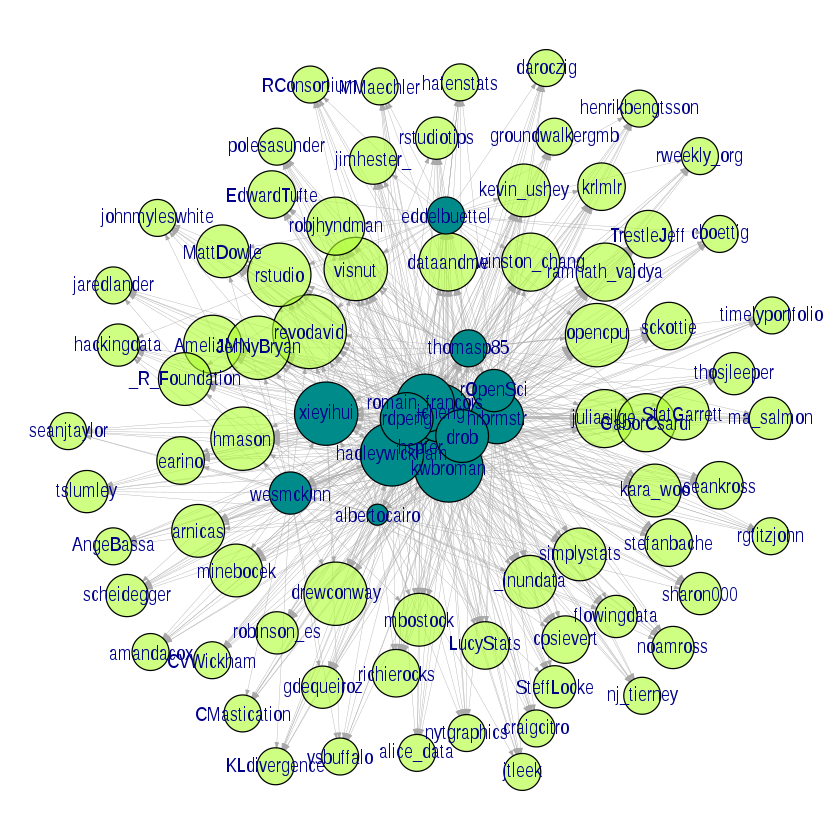

In [26]:
par(mar = rep(0, 4))
igraph::plot.igraph(g, edge.arrow.size = .2, 
    edge.width = .3,
    vertex.color = cols,
    vertex.label.family = "Arial Narrow",
    vertex.size = size * 1.5)

### Semantic networks

For examples on how to create "semantic" Twitter networks, check out the repos I made for [#rstudioconf](https://github.com/mkearney/rstudioconf_tweets/) and for [#NICAR18](https://github.com/computer-assisted-reporting/NICAR18).